## 从0开始搭建logistic回归(breast cancer dataset)

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import tensorflow as tf

In [508]:
breast_dataset = load_breast_cancer()
breast = pd.DataFrame(breast_dataset.data, columns=breast_dataset.feature_names)

In [509]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [510]:
# 对数据做归一化
breast = (breast - breast.min())/(breast.max()-breast.min())

In [511]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [512]:
breast['y'] = breast_dataset.target

In [513]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [514]:
test_dataset = breast.iloc[-int(0.2*len(breast)):,:]
train_dataset = breast.iloc[:-int(0.2*len(breast)),:]
print(test_dataset.shape, train_dataset.shape)

(113, 31) (456, 31)


In [515]:
test_dataset = tf.convert_to_tensor(test_dataset)
X_test = test_dataset[:,:-1]
y_test = test_dataset[:,-1]
train_dataset = tf.convert_to_tensor(train_dataset)
X_train = train_dataset[:,:-1]
y_train = train_dataset[:,-1]

In [516]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=len(data_arrays))
    dataset = dataset.batch(batch_size)
    return dataset

In [517]:
batch_size = 16
data_iter = load_array((train_dataset[:,:-1],train_dataset[:,-1]), batch_size, True)

In [518]:
for data in data_iter:
    print(data)
    break

(<tf.Tensor: shape=(16, 30), dtype=float64, numpy=
array([[0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        0.18176799, 0.20360825, 0.34875746, 0.37979798, 0.14132266,
        0.15643672, 0.08258929, 0.12444047, 0.12565979, 0.11938675,
        0.08132304, 0.0469697 , 0.25383595, 0.08453875, 0.0911101 ,
        0.60690146, 0.30357143, 0.53981772, 0.43521431, 0.34755332,
        0.15456336, 0.19297125, 0.63917526, 0.23358959, 0.22287813],
       [0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
        0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
        0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
        0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396],
       [0.2100904 , 0.36083869, 0.23350149, 0.10290562, 0.81132075,
        0.81136127, 0.5656045 , 0.52286282, 0.77626263, 1.     

In [537]:
# 初始化参数
W = tf.Variable(tf.zeros((30,1)), trainable=True)
b =tf.Variable(tf.zeros(1), trainable=True)

In [538]:
# 定义模型
def net(X, W, b):
    res = tf.matmul(tf.cast(X, dtype=W.dtype), W)+b
    res = 1/(1+tf.exp(-res))
    return res

In [539]:
# 定义损失函数
def loss(y_hat,y):
    y = tf.cast(y, dtype=y_hat.dtype)
    y = tf.reshape(y, y_hat.shape) 
    l = -y*tf.math.log(y_hat)-(1-y)*tf.math.log(1-y_hat)
    return l

In [540]:
# 定义优化算法
def sgd(params, grads, lr, batch_size):
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [541]:
def evaluate(y_pred, y):
    ones = tf.ones_like(y_pred)
    zeros = tf.zeros_like(y_pred)
    output = tf.where(y_pred > 0.5 , ones, zeros)
    y = tf.reshape(y, output.shape)
    res = tf.reduce_sum(tf.where(y == tf.cast(output, dtype=y.dtype), ones, zeros))/y.shape[0]
    return res.numpy()

In [542]:
lr = 0.15
batch_size = 16
res = []
for epoch in range(15):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            y_hat = net(tf.cast(X,dtype=W.dtype), W, b)
            l = loss(y_hat, y)
        dW, db = tape.gradient(l, [W,b])
        # print(dW, db)
        sgd([W, b],[dW, db], lr, batch_size)
    train_loss = loss(net(X_train, W, b), y_train)
    train_acc = evaluate(net(X_train, W, b), y_train)
    test_loss = loss(net(X_test, W, b), y_test)
    test_acc = evaluate(net(X_test, W, b), y_test)
    print('epoch:{}, train_loss:{}, train_acc:{}, test_loss:{}, test_acc:{}'\
        .format(epoch+1, float(tf.reduce_mean(train_loss)), train_acc,
                         float(tf.reduce_mean(test_loss)), test_acc))
    res.append([epoch+1, float(tf.reduce_mean(train_loss)), train_acc, float(tf.reduce_mean(test_loss)), test_acc])

epoch:1, train_loss:0.6133673191070557, train_acc:0.6118420958518982, test_loss:0.5418382883071899, test_acc:0.7964601516723633
epoch:2, train_loss:0.5396324992179871, train_acc:0.7478070259094238, test_loss:0.47144392132759094, test_acc:0.8938053250312805
epoch:3, train_loss:0.4844304323196411, train_acc:0.8377193212509155, test_loss:0.42116546630859375, test_acc:0.9115044474601746
epoch:4, train_loss:0.4419363737106323, train_acc:0.8530701994895935, test_loss:0.3838599920272827, test_acc:0.9469026327133179
epoch:5, train_loss:0.4084998667240143, train_acc:0.8618420958518982, test_loss:0.355186402797699, test_acc:0.9557521939277649
epoch:6, train_loss:0.38139036297798157, train_acc:0.8881579041481018, test_loss:0.33261725306510925, test_acc:0.9646017551422119
epoch:7, train_loss:0.3593684434890747, train_acc:0.8991228342056274, test_loss:0.3139286935329437, test_acc:0.9646017551422119
epoch:8, train_loss:0.34069690108299255, train_acc:0.9035087823867798, test_loss:0.298664927482605, t

In [543]:
import numpy as np

In [544]:
res_df = pd.DataFrame(np.array(res).reshape((-1, 5)), columns=['epoch', 'train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [551]:
res_df.set_index('epoch', inplace=True)

<AxesSubplot:xlabel='epoch'>

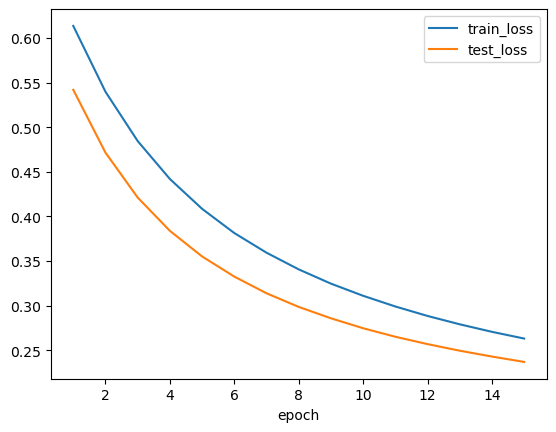

In [552]:
res_df[['train_loss', 'test_loss']].plot()

<AxesSubplot:xlabel='epoch'>

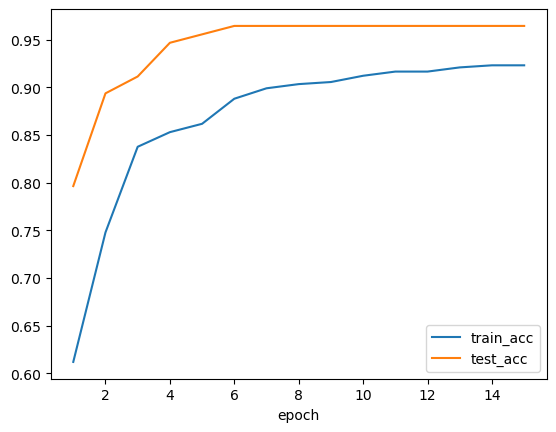

In [553]:
res_df[['train_acc', 'test_acc']].plot()

## 总结

关于实验过程中学习率设置得很小，梯度依然丢失的情况，原因在于没有进行归一化；    
假设数据原本分布如下：

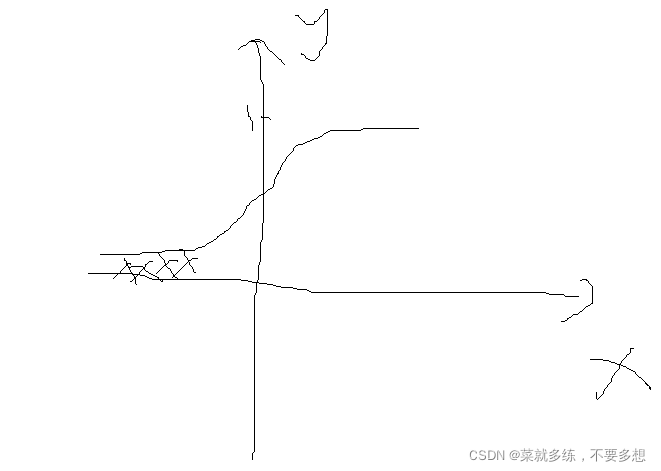

经过sigmoid处理之后，其输出值接近于0，梯度算出来也为0

但如果数据经过归一化，其分布如下：

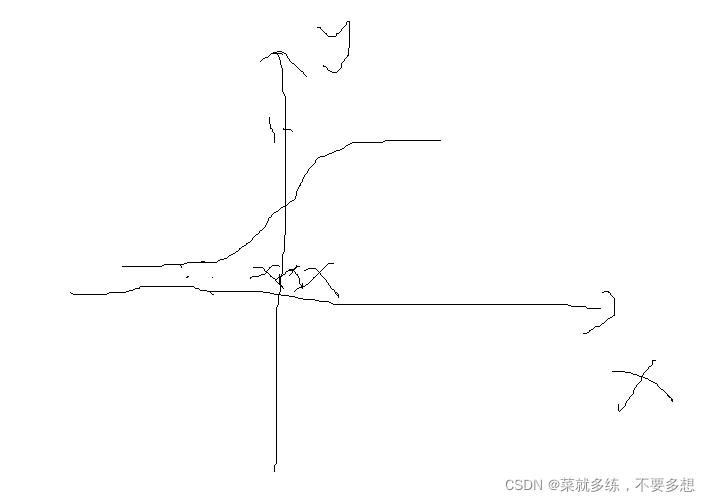

经由sigmoid的输出值也会相对高一些，计算出来的梯度也会越大

所以数据归一化不仅能处理梯度为0（梯度丢失的问题），还可以加速模型的收敛

参考链接：https://blog.csdn.net/weixin_45413024/article/details/122043591